In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import operator
import math

In [3]:
dataset=pd.read_csv("/content/drive/MyDrive/Assignment3_data/email-Eu-core.txt",sep=" ")

In [4]:
dataset

,0,1
0,2,3
1,2,4
2,5,6
3,5,7
4,8,9
...,...,...
25565,420,143
25566,174,859
25567,440,460
25568,52,786


In [5]:
len((dataset["0"]))

25570

In [6]:
print(dataset[dataset["0"]==660])
print(dataset[dataset["0"]==691])
print(dataset[dataset["0"]==675])
print(dataset[dataset["0"]==658])
print(dataset[dataset["0"]==633])

        0    1
3480  660  660
        0    1
4079  691  691
        0    1
3796  675  675
        0    1
3451  658  658
        0    1
3042  633  633


In [7]:
print("no of source vertices->",len(set(dataset["0"])))
print("no of destination vertices->",len(set(dataset["1"])))

no of source vertices-> 868
no of destination vertices-> 991


In [ ]:
edge_list=[]
for i in range(0,len(dataset)):
  temp=(dataset.iloc[i]["0"],dataset.iloc[i]["1"])
  edge_list.append(temp);
edge_list

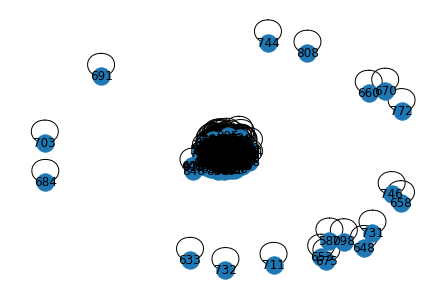

In [ ]:
G = nx.Graph()
G.add_edges_from(edge_list)
nx.draw(G, with_labels=True)
plt.show()

In [9]:
allColumns=set(dataset["0"]).union(set(dataset["1"]))
matrix=pd.DataFrame()
matrix["nodes"]=list(allColumns)
for i in list(allColumns):
  matrix[i]=0
matrix.drop(columns={"nodes"},axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


In [ ]:
temp=dataset[dataset["0"]==2]["1"]
list(temp)

In [11]:
for i in range(0,len(matrix)):
  temp=list(dataset[dataset["0"]==i]["1"])
  for j in temp:
    matrix.loc[i,j]=1

In [ ]:
matrix

In [13]:
list(matrix.iloc[0]).count(1)

40

Pagerank scores

In [14]:
def pagerank(k_iter):
  oldList=[]
  newList=[]
  for i in range(0,len(matrix)):
    oldList.append(1/1005)
  for i in range(0,k_iter):
    newList=[]
    for j in range(0,len(matrix)):
      ans=0
      indegree=list(matrix[matrix[j]==1].index)
      for vtc in indegree:
        ans+=(oldList[vtc]/(list(matrix.iloc[vtc]).count(1)))
      newList.append(ans)
    error=0
    for e in range(0,len(newList)):
      error+=abs(newList[e]-oldList[e])
    print("error->",error/len(newList))
    oldList=newList
  return newList

In [15]:
prScores=[]
prScores=pagerank(3)

error-> 0.0006610062776126493
error-> 0.00016240894210473297
error-> 4.5805721976234154e-05


In [ ]:
pr_dict=dict(zip(list(range(0,1005)),prScores))
sorted_dict = sorted(pr_dict.items(), key=operator.itemgetter(1),reverse=True)
sorted_dict


In [21]:
mat_trans=matrix.T

In [22]:
mat_array=mat_trans.to_numpy()

In [23]:
one_array=np.ones(1005)
print(one_array)
one_array.shape

[1. 1. 1. ... 1. 1. 1.]


(1005,)

In [24]:
mat_array.shape

(1005, 1005)

In [25]:
authority_array=np.matmul(mat_array, one_array)
print(authority_array)

[32. 50. 77. ...  1.  1.  1.]


In [26]:
hub_array=np.matmul(mat_array.T, authority_array)
hub_array

array([1952.,   50., 4521., ...,    0.,   32.,    0.])

In [27]:
hub_list=hub_array.tolist()
authority_list=authority_array.tolist()

Hub

In [28]:
def hub(k_iter):
  oldList=[]
  newList=[]
  #initialization
  if(k_iter==1):
    return hub_list
  
  square_sum=0
  for i in range(0,len(hub_list)):
    square_sum+=pow(hub_list[i],2)
  for i in range(0,len(hub_list)):
    oldList.append(hub_list[i]/math.sqrt(square_sum))
  
  if(k_iter==2):
    return oldList

  for i in range(2,k_iter):
    square_temp=0
    newList=[]
    for j in range(0,len(oldList)):
      square_temp+=pow(oldList[j],2)
    for j in range(0,len(oldList)):
      newList.append(oldList[j]/math.sqrt(square_temp))
    error=0
    for e in range(0,len(newList)):
      error+=abs(newList[e]-oldList[e])
    print("error->",error/len(newList))
    oldList=newList
  return newList

In [29]:
hubScores=[]
hubScores=hub(3)

error-> 4.112669444178029e-18


In [ ]:
hubScores

In [36]:
hub_dict=dict(zip(list(range(0,1005)),hubScores))
sorted_dict = sorted(hub_dict.items(), key=operator.itemgetter(1),reverse=True)
sorted_dict

[(160, 0.1899507854296232),
 (82, 0.16126707420938557),
 (121, 0.16024265595151996),
 (107, 0.14674134865554728),
 (62, 0.13924208166527452),
 (249, 0.1370487759080494),
 (434, 0.1290635669236609),
 (86, 0.12776334375021606),
 (183, 0.12492649318997276),
 (211, 0.11145145302881716),
 (114, 0.1105321033102198),
 (129, 0.11015122985537232),
 (21, 0.10757705064329971),
 (105, 0.10635562887430608),
 (283, 0.10424112452153214),
 (87, 0.10192961665763021),
 (333, 0.10192961665763021),
 (142, 0.10110220191089259),
 (13, 0.09972317733299654),
 (820, 0.09952617382186854),
 (83, 0.09897456399071013),
 (212, 0.09859369053586264),
 (282, 0.09800268000247862),
 (128, 0.09797641286766157),
 (169, 0.09680752536830206),
 (58, 0.09595384348674736),
 (405, 0.09591444278452177),
 (115, 0.0958881756497047),
 (166, 0.09574370640821082),
 (63, 0.09465362031330253),
 (5, 0.09341906497690038),
 (424, 0.09084488576482776),
 (81, 0.08586726371699348),
 (252, 0.08469837621763397),
 (106, 0.0841993006561097),
 (5

Authority

In [32]:
def authority(k_iter):
  oldList=[]
  newList=[]
  #initialization
  if(k_iter==1):
    return authority_list

  square_sum=0
  for i in range(0,len(authority_list)):
    square_sum+=pow(authority_list[i],2)
  for i in range(0,len(authority_list)):
    oldList.append(authority_list[i]/math.sqrt(square_sum))

  if(k_iter==2):
    return oldList

  for i in range(2,k_iter):
    square_temp=0
    newList=[]
    for j in range(0,len(oldList)):
      square_temp+=pow(oldList[j],2)
    for j in range(0,len(oldList)):
      newList.append(oldList[j]/math.sqrt(square_temp))
    error=0
    for e in range(0,len(newList)):
      error+=abs(newList[e]-oldList[e])
    print("error->",error/len(newList))
    oldList=newList
  return newList

In [33]:
atScores=[]
atScores=authority(3)

error-> 2.3457280375993097e-17


In [ ]:
atScores

In [38]:
at_dict=dict(zip(list(range(0,1005)),atScores))
sorted_dict = sorted(at_dict.items(), key=operator.itemgetter(1),reverse=True)
sorted_dict

[(160, 0.17691144063853392),
 (62, 0.14937333902970554),
 (107, 0.14102845975430298),
 (121, 0.13101460462381995),
 (86, 0.1285111408411992),
 (434, 0.1260076770585784),
 (183, 0.11933177363825637),
 (129, 0.11599382192809536),
 (64, 0.1134903581454746),
 (128, 0.11015240643531357),
 (106, 0.10681445472515255),
 (166, 0.10597996679761232),
 (5, 0.10347650301499155),
 (82, 0.10097303923237078),
 (283, 0.10013855130483053),
 (211, 0.09846957544975002),
 (256, 0.09846957544975002),
 (301, 0.09680059959466951),
 (105, 0.09596611166712925),
 (249, 0.0934626478845085),
 (21, 0.09262815995696824),
 (87, 0.09095918410188773),
 (114, 0.09095918410188773),
 (420, 0.09095918410188773),
 (282, 0.08845572031926696),
 (63, 0.08678674446418645),
 (280, 0.08678674446418645),
 (58, 0.0859522565366462),
 (115, 0.0842832806815657),
 (212, 0.0842832806815657),
 (142, 0.08261430482648519),
 (96, 0.08094532897140468),
 (28, 0.08011084104386443),
 (169, 0.08011084104386443),
 (820, 0.08011084104386443),
 (33

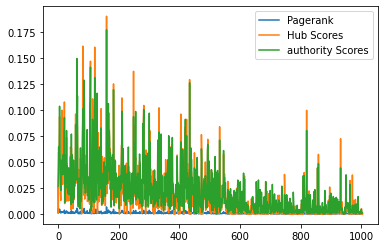

In [35]:
plt.plot(list(range(0,1005)), prScores, label = "Pagerank")
plt.plot(list(range(0,1005)), hubScores, label = "Hub Scores")
plt.plot(list(range(0,1005)), atScores, label = "authority Scores")
plt.legend()
plt.show()